In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/fifa_project.csv")
pd.set_option('display.max_columns',100)
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions', 'Wage']]

In [82]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K


##### Values in value and wage columns have different units(M and K). Cleaning these columns.

In [83]:
# Value column
df['Unit'] = df['Value'].str[-1]
# Remove unit symbols from values
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Value (M)'] = df['Value (M)'].astype(float)
# The values which are in K are converted to Millions.
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)


# Wage columns
df['Unit2'] = df['Wage'].str[-1]
df['Wage (M)'] = np.where(df['Unit2'] == '0', 0, df['Wage'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Wage (M)'] = df['Wage (M)'].astype(float)
df['Wage (M)'] = np.where(df['Unit2'] == 'M', df['Wage (M)'], df['Wage (M)']/1000)

df.drop(['Unit','Unit2'],axis=1,inplace=True)
# There are multiple positions for many players, so we take the first position.
df['Position'] = df['Preferred Positions'].str.split().str[0]

In [25]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage,Value (M),Wage (M),Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K,95.5,0.565,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K,105.0,0.565,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K,123.0,0.280,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K,97.0,0.510,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K,61.0,0.230,GK


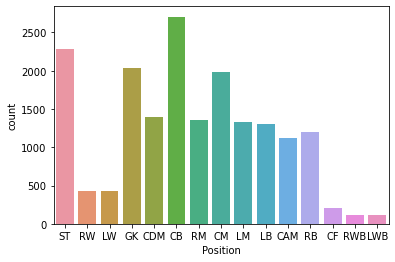

In [36]:
import seaborn as sns
sns.countplot(df['Position'])
plt.show()

<AxesSubplot:xlabel='Wage (M)', ylabel='Density'>

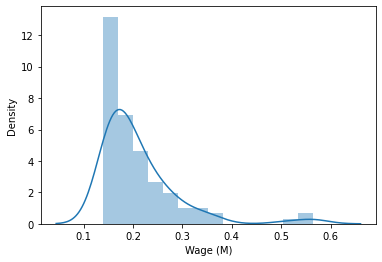

In [52]:
value_distribution_values = df.sort_values('Wage (M)',ascending=False)['Wage (M)'].head(100)
sns.distplot(value_distribution_values)

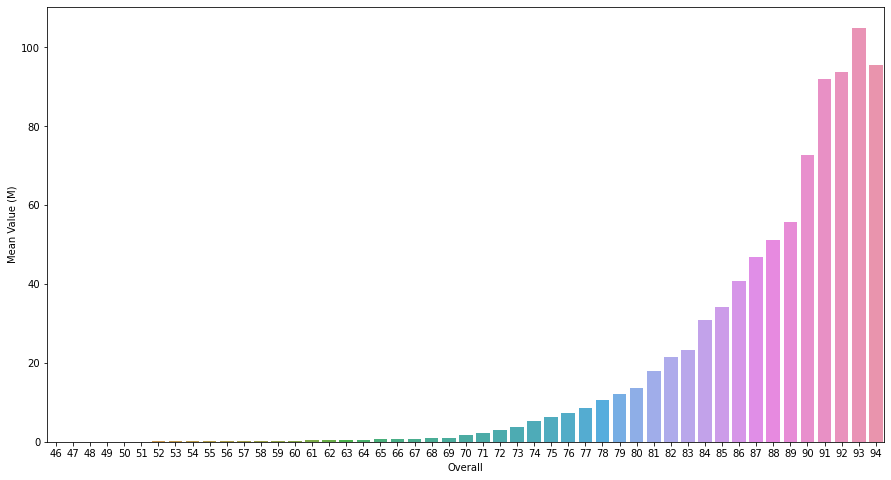

In [74]:
overall = df.sort_values('Overall',ascending=False)['Overall']
overall_value = df['Value (M)'].groupby(overall).mean()
plt.figure(figsize=(15,8))
sns.barplot(overall_value.index,overall_value.values)
plt.ylabel("Mean Value (M)")
plt.show()

#### Lets find best players for each positions

In [84]:
# 4-3-3 formation
p_list_1= ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
# 3-5-2 formation
p_list_2 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']

In [135]:
df1 = pd.DataFrame(columns=["Name","Overall","Position"])
for pos in p_list_1:
    name = df[df['Position']==pos].sort_values('Overall',ascending=False).iloc[0]["Name"]
    overall = df[df['Position']==pos].sort_values('Overall',ascending=False).iloc[0]["Overall"]
    df1.loc[len(df1.index)] = [name,overall,pos]

df2 = pd.DataFrame(columns=["Name","Overall","Position"])
for pos in p_list_2:
    name = df[df['Position']==pos].sort_values('Overall',ascending=False).iloc[0]["Name"]
    overall = df[df['Position']==pos].sort_values('Overall',ascending=False).iloc[0]["Overall"]
    df2.loc[len(df2.index)] = [name,overall,pos]


In [129]:
df1

,Name,Overall,Position
0,M. Neuer,92,GK
1,Marcelo,87,LB
2,Sergio Ramos,90,CB
3,Sergio Ramos,90,CB
4,Carvajal,84,RB
5,C. Eriksen,87,LM
6,T. Kroos,90,CDM
7,K. De Bruyne,89,RM
8,Neymar,92,LW
9,Cristiano Ronaldo,94,ST


In [130]:
df2

,Name,Overall,Position
0,M. Neuer,92,GK
1,D. Rose,82,LWB
2,Sergio Ramos,90,CB
3,K. Walker,83,RWB
4,C. Eriksen,87,LM
5,T. Kroos,90,CDM
6,Coutinho,86,CAM
7,N. Kanté,87,CM
8,K. De Bruyne,89,RM
9,Neymar,92,LW


In [131]:
if (df1['Overall'].mean())>(df2['Overall'].mean()):
    print("df1 Average Overall = ",df1['Overall'].mean(),"\n",df1)
else:
    print("df2 Average Overall = ",df2['Overall'].mean(),"\n",df2)

df1 Average Overall =  89.81818181818181 
                  Name Overall Position
0            M. Neuer      92       GK
1             Marcelo      87       LB
2        Sergio Ramos      90       CB
3        Sergio Ramos      90       CB
4            Carvajal      84       RB
5          C. Eriksen      87       LM
6            T. Kroos      90      CDM
7        K. De Bruyne      89       RM
8              Neymar      92       LW
9   Cristiano Ronaldo      94       ST
10           L. Messi      93       RW


#### Suppose we want a player in the next transfer window and want to know the value of that player. The following model will exactly help us with that problem.

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

X = df[['Overall','Potential','Wage (M)']]
y = df['Value (M)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 = {0} \n mae = {1}".format(r2,mae))

R2 = 0.746327813472971 
 mae = 1.394595127663726


In [134]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_2 = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_2,y_train)
X_test_2 = poly.transform(X_test)
y_pred_2 = model.predict(X_test_2)
r2 = r2_score(y_test,y_pred_2)
mae = mean_absolute_error(y_test,y_pred_2)
print("R2 = {0} \n mae = {1}".format(r2,mae))

R2 = 0.9307805489700389 
 mae = 0.5326507222204507
